In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

- 怀孕次数

In [5]:
columns=['times_pregnant','plasma_glucose_concentration','diastolic_blood_pressure','triceps_thickness','serum_insulin','bmi','pedigree_function','age','onset_diabetes']

In [6]:
data = pd.read_csv('pima-indians-diabetes.csv',names=columns)
data.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data['onset_diabetes'].value_counts()

0    500
1    268
Name: onset_diabetes, dtype: int64

In [9]:
500/768

0.6510416666666666

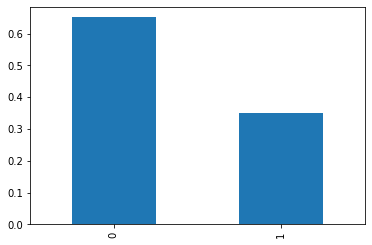

In [34]:
# 查看数据分布,空准确率
pd.value_counts(data['onset_diabetes'],normalize=True).plot(kind='bar')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
times_pregnant                  768 non-null int64
plasma_glucose_concentration    768 non-null int64
diastolic_blood_pressure        768 non-null int64
triceps_thickness               768 non-null int64
serum_insulin                   768 non-null int64
bmi                             768 non-null float64
pedigree_function               768 non-null float64
age                             768 non-null int64
onset_diabetes                  768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
768*8

6144

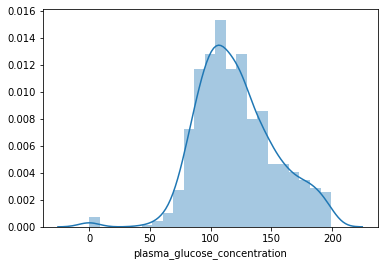

In [35]:
sns.distplot(data['plasma_glucose_concentration'])

In [36]:
data[data['onset_diabetes']==0]['plasma_glucose_concentration']

1       85
3       89
5      116
7      115
10     110
12     139
18     103
20     126
21      99
27      97
28     145
29     117
30     109
32      88
33      92
34     122
35     103
36     138
40     180
41     133
42     106
44     159
46     146
47      71
49     105
50     103
51     101
52      88
54     150
55      73
      ... 
720     83
721    114
723    117
724    111
725    112
726    116
727    141
728    175
729     92
733    106
734    105
735     95
736    126
737     65
738     99
741    102
742    109
744    153
745    100
747     81
751    121
752    108
756    137
758    106
760     88
762     89
763    101
764    122
765    121
767     93
Name: plasma_glucose_concentration, Length: 500, dtype: int64

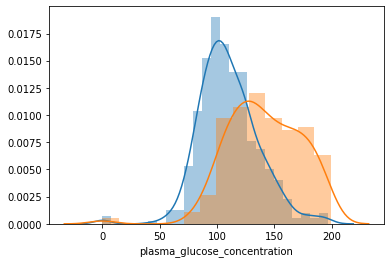

In [37]:
sns.distplot(data[data['onset_diabetes']==0]['plasma_glucose_concentration'])
sns.distplot(data[data['onset_diabetes']==1]['plasma_glucose_concentration'])

In [38]:
data[data['times_pregnant']>10]['onset_diabetes'].value_counts()

1    20
0    14
Name: onset_diabetes, dtype: int64

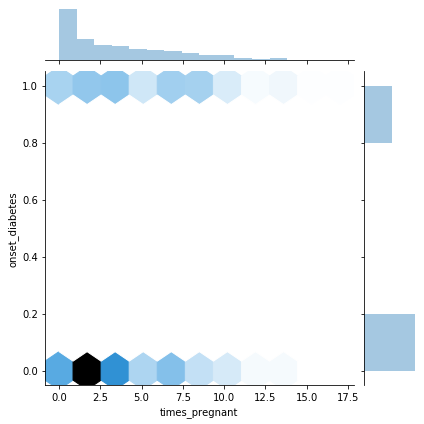

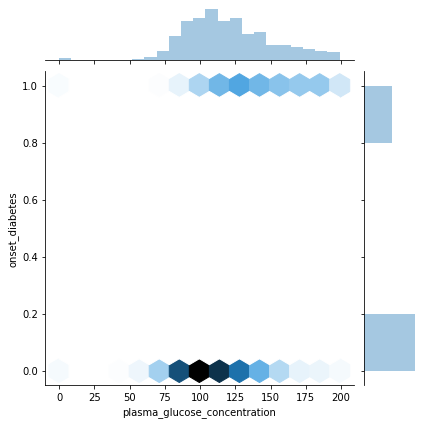

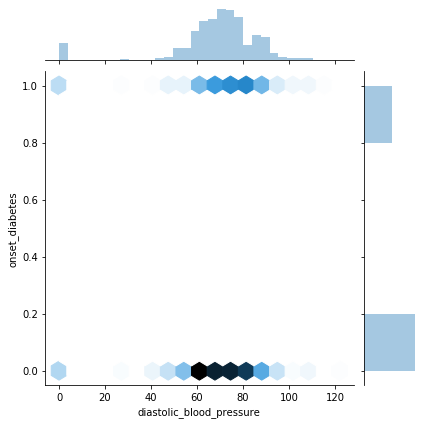

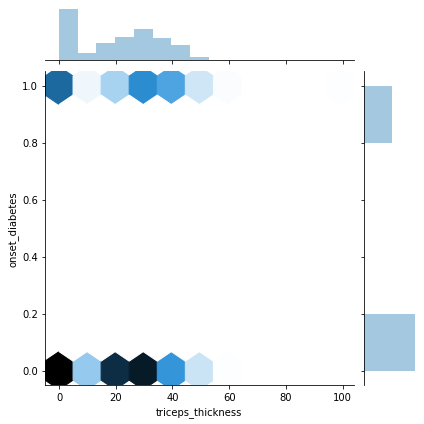

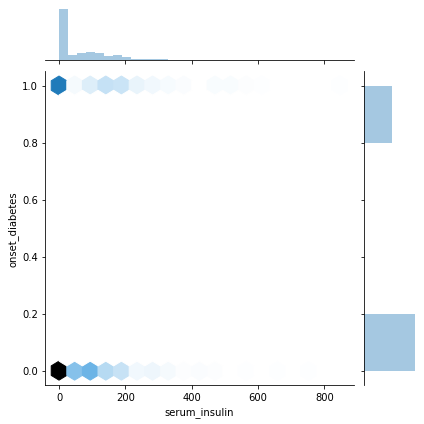

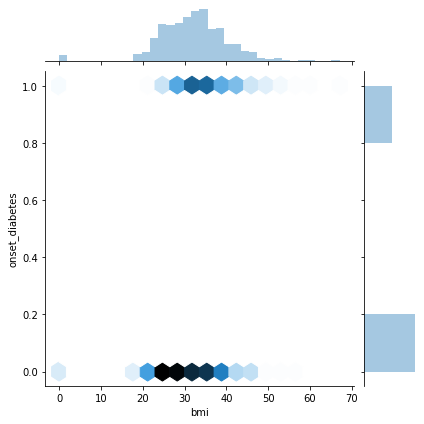

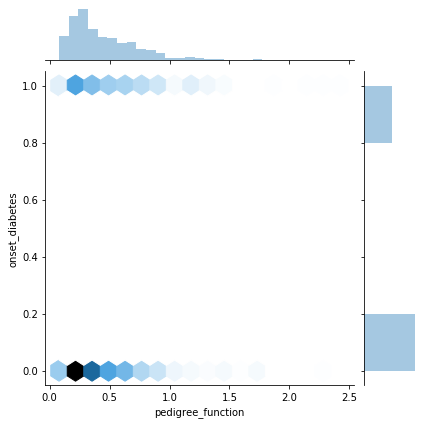

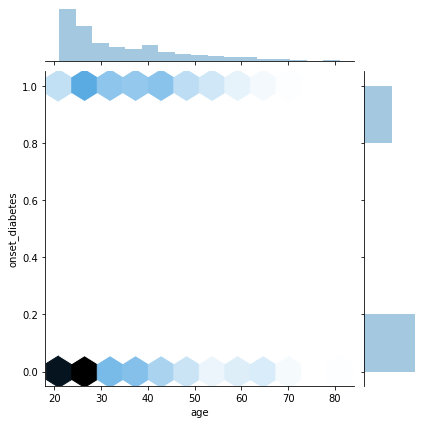

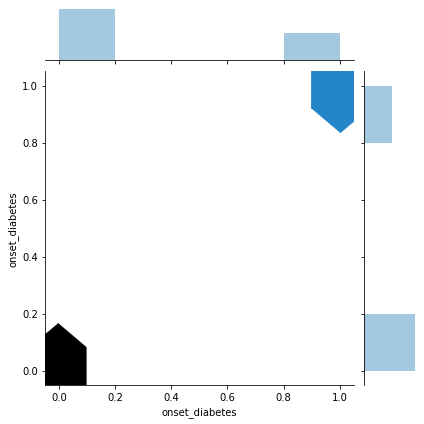

In [39]:
# for col in ['diastolic_blood_pressure','serum_insulin','bmi','pedigree_function','age']
for i in data.columns:
    sns.jointplot(x=i,y='onset_diabetes',data=data,kind='hex')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


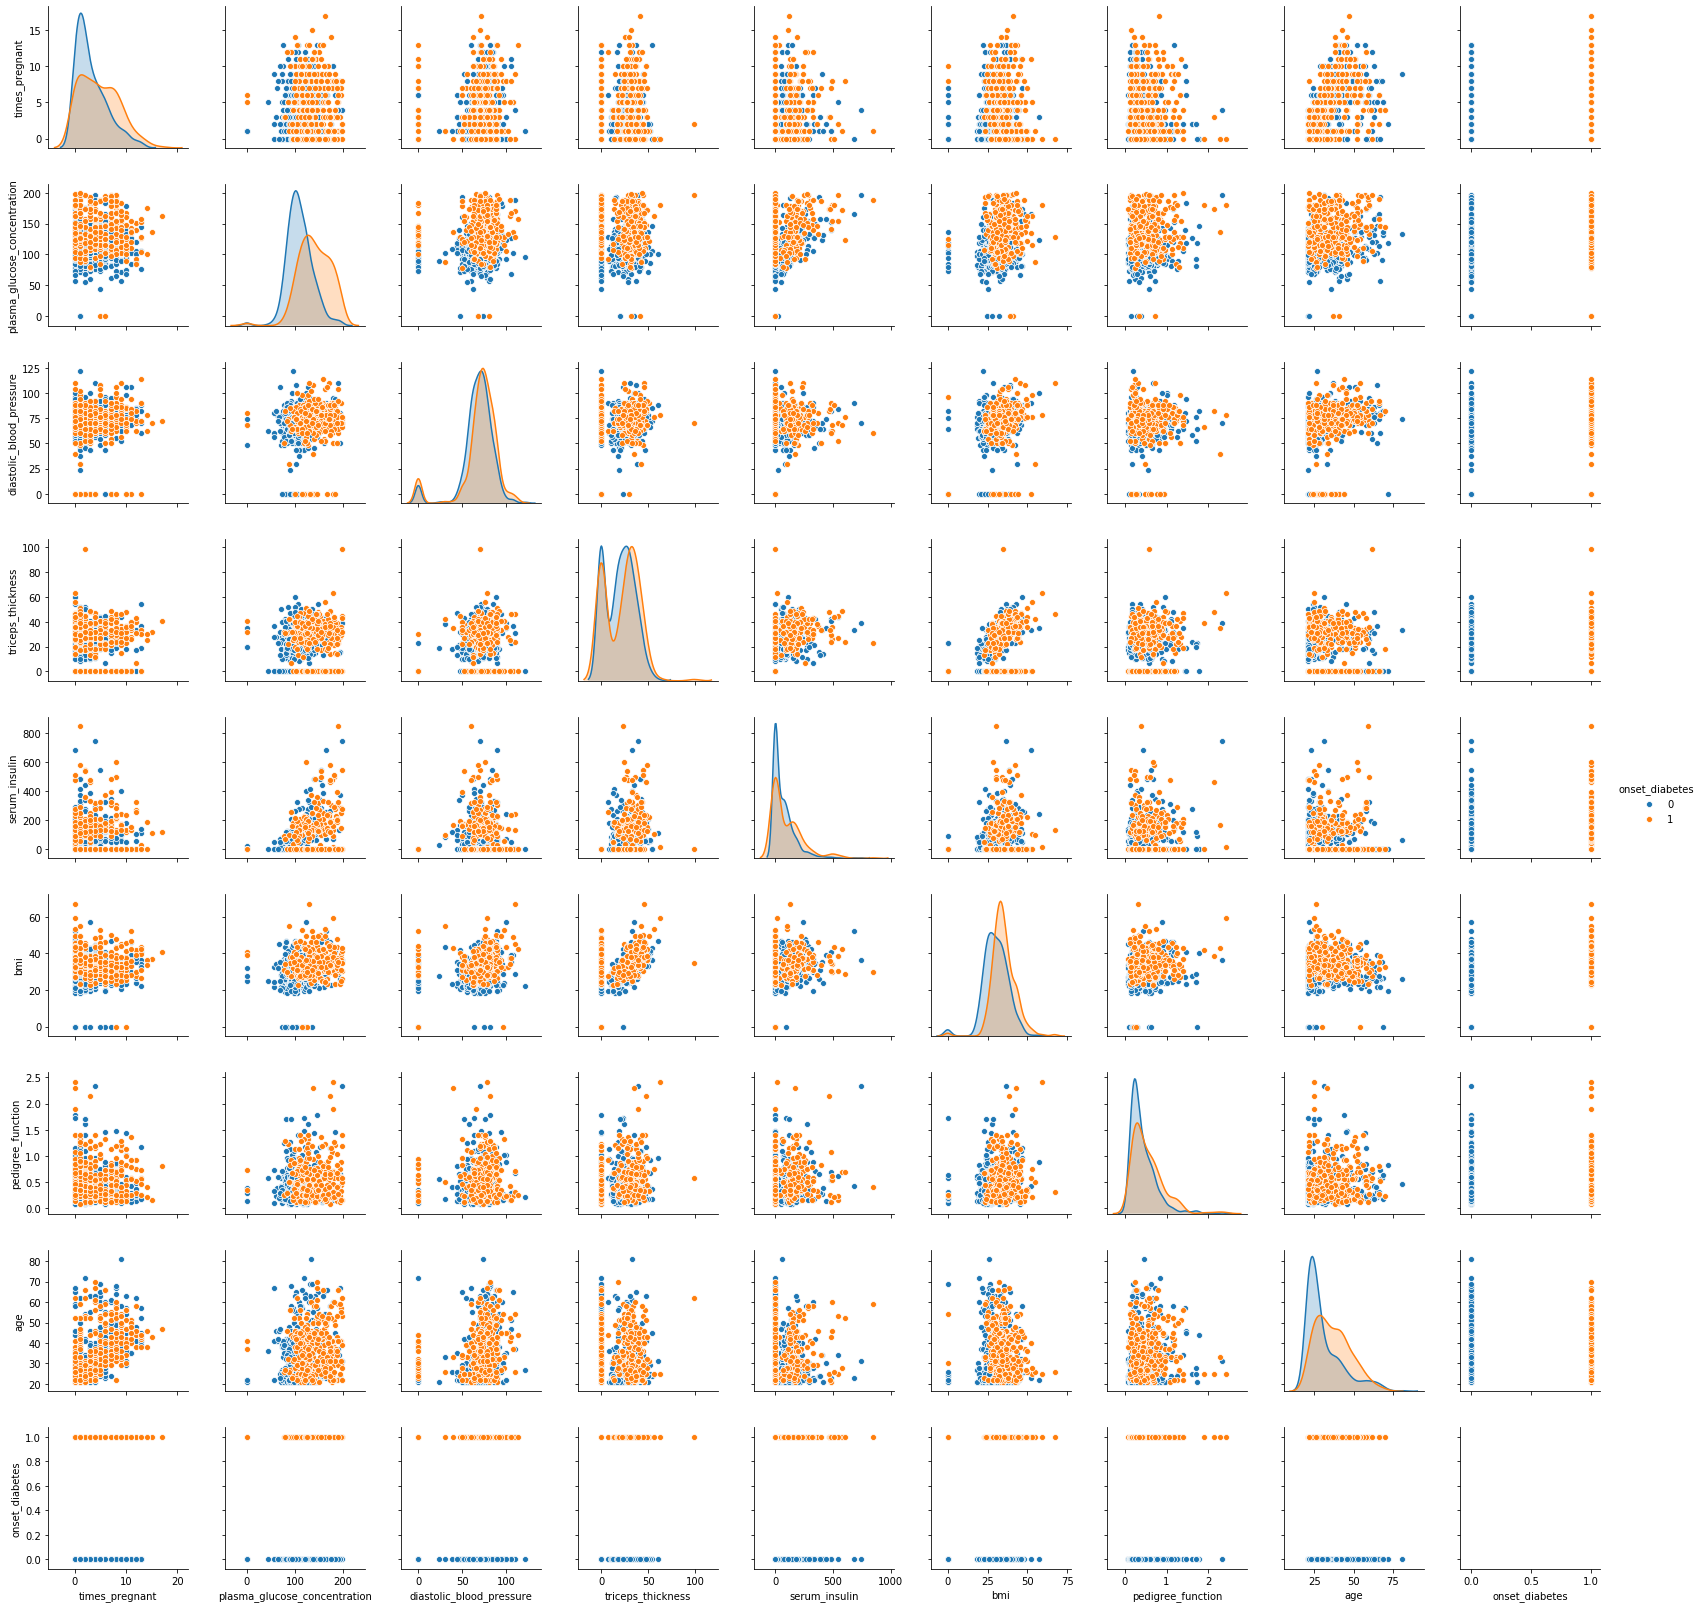

In [16]:
sns.pairplot(data,hue='onset_diabetes')

In [40]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [41]:
# data_ss = (X- X.min()) / (X.max()-X.min()) 
data_ss = pd.concat([y,data_ss],axis=1)
data_ss.head()

,onset_diabetes,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age
0,1,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,1,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,1,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [21]:
data

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [24]:
df = pd.melt(frame=data,id_vars='onset_diabetes',var_name="features",value_name='value')
df.head()

,onset_diabetes,features,value
0,1,times_pregnant,6.0
1,0,times_pregnant,1.0
2,1,times_pregnant,8.0
3,0,times_pregnant,1.0
4,1,times_pregnant,0.0


In [18]:
df.shape

(6144, 3)

In [19]:
df

,onset_diabetes,features,value
0,1,times_pregnant,6.0
1,0,times_pregnant,1.0
2,1,times_pregnant,8.0
3,0,times_pregnant,1.0
4,1,times_pregnant,0.0
5,0,times_pregnant,5.0
6,1,times_pregnant,3.0
7,0,times_pregnant,10.0
8,1,times_pregnant,2.0
9,1,times_pregnant,8.0


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

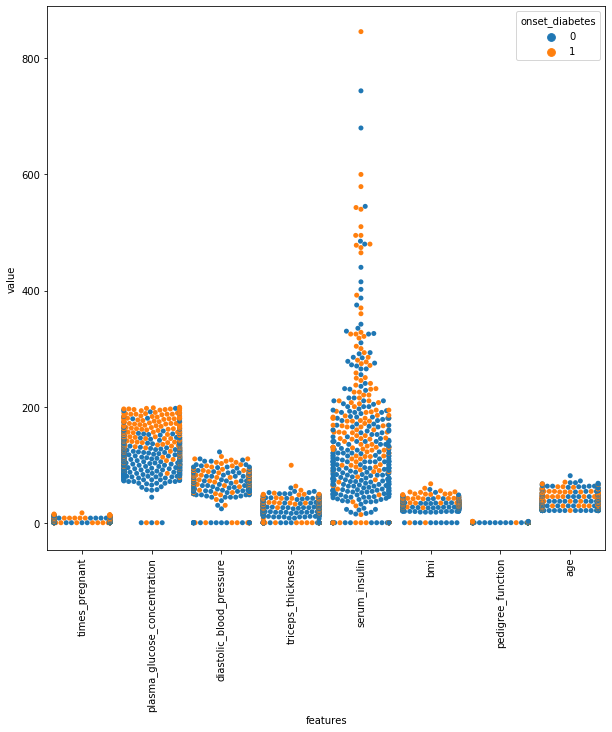

In [25]:
plt.figure(figsize=(10,10))
sns.swarmplot(x='features',y='value',hue='onset_diabetes',data=df)
plt.xticks(rotation=90)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
times_pregnant                  768 non-null int64
plasma_glucose_concentration    768 non-null int64
diastolic_blood_pressure        768 non-null int64
triceps_thickness               768 non-null int64
serum_insulin                   768 non-null int64
bmi                             768 non-null float64
pedigree_function               768 non-null float64
age                             768 non-null int64
onset_diabetes                  768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
data.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [28]:
for col in [col for col in data.columns if col not in ['onset_diabetes','pedigree_function','age','times_pregnant']]:
    data[col].replace([0],[np.nan],inplace=True)
    

In [29]:
data.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [31]:
data.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [32]:
data[data['plasma_glucose_concentration'].isnull()]

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
75,1,NaN,48.0,20.0,NaN,24.7,0.140,22,0
182,1,NaN,74.0,20.0,23.0,27.7,0.299,21,0
342,1,NaN,68.0,35.0,NaN,32.0,0.389,22,0
349,5,NaN,80.0,32.0,NaN,41.0,0.346,37,1
502,6,NaN,68.0,41.0,NaN,39.0,0.727,41,1


### 1. 删除空值多的列和含有空值的行 做baseline

In [33]:
df = data.loc[:,['times_pregnant','plasma_glucose_concentration','diastolic_blood_pressure','bmi','pedigree_function','age','onset_diabetes']]
df.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,bmi,pedigree_function,age,onset_diabetes
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1


In [34]:
df.shape

(768, 7)

In [35]:
df.dropna().isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [36]:
df.dropna(inplace=True)
X = df.iloc[:,:-1]
y=df['onset_diabetes']

In [53]:
X.shape

(724, 6)

In [37]:
X.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
bmi                             0
pedigree_function               0
age                             0
dtype: int64

In [38]:
from sklearn.model_selection import train_test_split


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       102
           1       0.68      0.58      0.63        43

    accuracy                           0.79       145
   macro avg       0.75      0.73      0.74       145
weighted avg       0.79      0.79      0.79       145



### 2. 填充空值少的行

In [48]:
df1 = data.loc[:,['times_pregnant','plasma_glucose_concentration','diastolic_blood_pressure','bmi','pedigree_function','age','onset_diabetes']]
df1.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,bmi,pedigree_function,age,onset_diabetes
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1


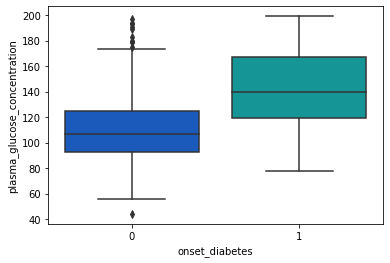

In [49]:
sns.boxplot(y='plasma_glucose_concentration',x='onset_diabetes',data=data,orient='v',palette='winter')

In [50]:
df1['plasma_glucose_concentration'] = df1.groupby('onset_diabetes')['plasma_glucose_concentration'].transform(lambda x:x.fillna(x.median()))

In [52]:
df1.isnull().sum()

times_pregnant                   0
plasma_glucose_concentration     0
diastolic_blood_pressure        35
bmi                             11
pedigree_function                0
age                              0
onset_diabetes                   0
dtype: int64

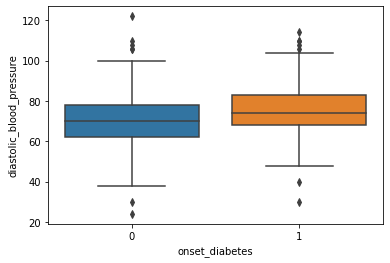

In [88]:
sns.boxplot(y='diastolic_blood_pressure',x='onset_diabetes',data=df1)

In [85]:
df1['diastolic_blood_pressure'] = df1.groupby('onset_diabetes')['diastolic_blood_pressure'].apply(lambda x:x.fillna(x.median()))

In [89]:
df1['bmi'] = df1.groupby('onset_diabetes')['bmi'].transform(lambda x:x.fillna(x.median()))

In [90]:
df1.dropna(inplace=True)
X = df1.iloc[:,:-1]
y=df1['onset_diabetes']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [91]:
lr1 = LogisticRegression()
lr1.fit(X_train,y_train)
y_pred = lr1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        91
           1       0.77      0.55      0.64        55

    accuracy                           0.77       146
   macro avg       0.77      0.72      0.73       146
weighted avg       0.77      0.77      0.76       146



C:\Users\Master\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


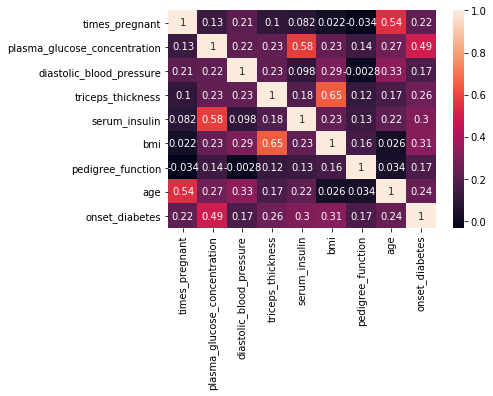

In [475]:
sns.heatmap(data.corr(),annot=True)

In [474]:
# sns.pairplot(data)

### 3. 填充空值多的列

In [179]:
df3 = data.copy()
df3.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [180]:
col = [col for col in data.columns if col in ['plasma_glucose_concentration','diastolic_blood_pressure','bmi']]
col

['plasma_glucose_concentration', 'diastolic_blood_pressure', 'bmi']

In [181]:
for c in col:
    df3[c] = df3.groupby('onset_diabetes')[c].transform(lambda x:x.fillna(x.median()))
df3.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      0
diastolic_blood_pressure          0
triceps_thickness               227
serum_insulin                   374
bmi                               0
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [182]:
# data['serum_insulin'] = 
# data.groupby(['onset_diabetes','plasma_glucose_concentration'])['serum_insulin'].transform(lambda x:x.fillna(x.mean())).isnull().sum()

In [183]:
# df3['plasma_glucose_concentration_bin'] = pd.qcut(df3['plasma_glucose_concentration'],q=[0,0.08,0.8,1],labels=['低','中','高'])

In [184]:
df3['serum_insulin'] = df3.groupby(['onset_diabetes','plasma_glucose_concentration'])['serum_insulin'].transform(lambda x:x.fillna(x.median()))

In [185]:
df3['serum_insulin'] = df3.groupby(['onset_diabetes'])['serum_insulin'].transform(lambda x:x.fillna(x.median()))

In [186]:
# df3['serum_insulin'] = df3.groupby(['onset_diabetes','plasma_glucose_concentration_bin'])['serum_insulin'].transform(lambda x:x.fillna(x.mean()))

In [187]:
df3.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      0
diastolic_blood_pressure          0
triceps_thickness               227
serum_insulin                     0
bmi                               0
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [188]:
# df3['bmi_bin'] = pd.qcut(df3['bmi'],q=[0,0.1,0.9,1],labels=['低','中','高'])

In [189]:
df3['triceps_thickness'] = df3.groupby(['onset_diabetes','bmi'])['triceps_thickness'].transform(lambda x:x.fillna(x.median()))

In [190]:
df3['triceps_thickness'] = df3.groupby(['onset_diabetes'])['triceps_thickness'].transform(lambda x:x.fillna(x.median()))

In [191]:
# df3['triceps_thickness'] = df3.groupby(['onset_diabetes','bmi_bin'])['triceps_thickness'].transform(lambda x:x.fillna(x.mean()))

In [192]:
df3.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [193]:
df3.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148.0,72.0,35.0,277.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,49.0,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [194]:
# df1.dropna(inplace=True)
X = df3.iloc[:,:-3]
y=df3['onset_diabetes']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [195]:
lr3 = LogisticRegression()
lr3.fit(X_train,y_train)
y_pred = lr3.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



C:\Users\Master\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [496]:
data.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,733.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.405184,28.506304,153.664437,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.382158,9.876610,103.266340,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,21.875000,83.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,132.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.000000,184.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


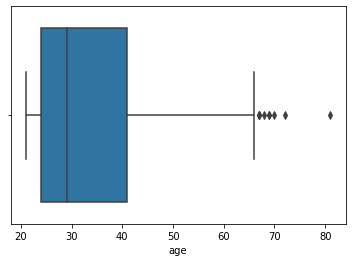

In [497]:
sns.boxplot(data['age'])

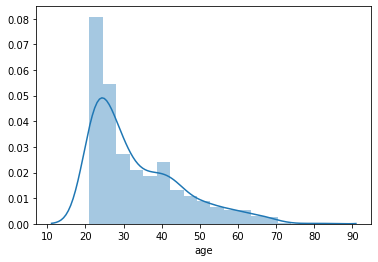

In [498]:
sns.distplot(data['age'])

In [499]:
data['age_bin'] = pd.cut(data['age'],bins=7,labels=[2,3,4,5,6,7,8])

In [500]:
data['diastolic_blood_pressure'] = data.groupby('age_bin')['diastolic_blood_pressure'].transform(lambda x:x.fillna(x.median()))

In [501]:
data.isnull().sum()

times_pregnant                      0
plasma_glucose_concentration        0
diastolic_blood_pressure            0
triceps_thickness                   0
serum_insulin                       0
bmi                                 0
pedigree_function                   0
age                                 0
onset_diabetes                      0
plasma_glucose_concentration_bin    0
bmi_bin                             0
age_bin                             0
dtype: int64

In [502]:
data.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes,plasma_glucose_concentration_bin,bmi_bin,age_bin
0,6,148.0,72.0,35.0,277.500000,33.6,0.627,50,1,高,中,5
1,1,85.0,66.0,29.0,49.000000,26.6,0.351,31,0,中,中,3
2,8,183.0,64.0,15.0,242.589474,23.3,0.672,32,1,高,低,3
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0,中,中,2
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1,中,高,3


In [503]:
# temp = pd.get_dummies(data['times_pregnant'],prefix='times_pregnant')
# data = pd.concat([data,temp],axis=1)
del data['times_pregnant']

In [504]:
temp = pd.get_dummies(data['age_bin'],prefix='age')
data = pd.concat([data,temp],axis=1)
del data['age']
del data['age_bin']

In [505]:
temp = pd.get_dummies(data['bmi_bin'],prefix='bmi')
data = pd.concat([data,temp],axis=1)
del data['bmi_bin']
del data['bmi']

In [506]:
temp = pd.get_dummies(data['plasma_glucose_concentration_bin'],prefix='glucose')
data = pd.concat([data,temp],axis=1)
del data['plasma_glucose_concentration_bin']
del data['plasma_glucose_concentration']

In [507]:
data.head()

,diastolic_blood_pressure,triceps_thickness,serum_insulin,pedigree_function,onset_diabetes,age_2,age_3,age_4,age_5,age_6,age_7,age_8,bmi_低,bmi_中,bmi_高,glucose_低,glucose_中,glucose_高
0,72.0,35.0,277.500000,0.627,1,0,0,0,1,0,0,0,0,1,0,0,0,1
1,66.0,29.0,49.000000,0.351,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,64.0,15.0,242.589474,0.672,1,0,1,0,0,0,0,0,1,0,0,0,0,1
3,66.0,23.0,94.000000,0.167,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,40.0,35.0,168.000000,2.288,1,0,1,0,0,0,0,0,0,0,1,0,1,0


In [508]:
col = [col for col  in data.columns if col not in ['onset_diabetes']]

In [509]:
X = data.loc[:,col]
y = data['onset_diabetes']
X.head()

,diastolic_blood_pressure,triceps_thickness,serum_insulin,pedigree_function,age_2,age_3,age_4,age_5,age_6,age_7,age_8,bmi_低,bmi_中,bmi_高,glucose_低,glucose_中,glucose_高
0,72.0,35.0,277.500000,0.627,0,0,0,1,0,0,0,0,1,0,0,0,1
1,66.0,29.0,49.000000,0.351,0,1,0,0,0,0,0,0,1,0,0,1,0
2,64.0,15.0,242.589474,0.672,0,1,0,0,0,0,0,1,0,0,0,0,1
3,66.0,23.0,94.000000,0.167,1,0,0,0,0,0,0,0,1,0,0,1,0
4,40.0,35.0,168.000000,2.288,0,1,0,0,0,0,0,0,0,1,0,1,0


In [510]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 17 columns):
diastolic_blood_pressure    768 non-null float64
triceps_thickness           768 non-null float64
serum_insulin               768 non-null float64
pedigree_function           768 non-null float64
age_2                       768 non-null uint8
age_3                       768 non-null uint8
age_4                       768 non-null uint8
age_5                       768 non-null uint8
age_6                       768 non-null uint8
age_7                       768 non-null uint8
age_8                       768 non-null uint8
bmi_低                       768 non-null uint8
bmi_中                       768 non-null uint8
bmi_高                       768 non-null uint8
glucose_低                   768 non-null uint8
glucose_中                   768 non-null uint8
glucose_高                   768 non-null uint8
dtypes: float64(4), uint8(13)
memory usage: 33.8 KB


In [451]:
from sklearn.preprocessing import MinMaxScaler

In [511]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

In [192]:
pipe = Pipeline([('minmaxscaler',MinMaxScaler()),('classify',LogisticRegression(solver='newton-cg'))])

In [512]:
pipe1 = Pipeline([('classify',LogisticRegression(solver='newton-cg'))])

In [513]:
params = {"classify__C":np.logspace(-3,3,10)}
grid1 = GridSearchCV(pipe1,param_grid=params,cv=10,refit=True)

In [514]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [515]:
grid1.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('classify',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='warn',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,
                           

In [516]:
y_pred = grid1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87        99
           1       0.85      0.62      0.72        55

    accuracy                           0.82       154
   macro avg       0.83      0.78      0.79       154
weighted avg       0.83      0.82      0.82       154



In [206]:
df = data.groupby('times_pregnant')['onset_diabetes'].count()

In [207]:
df

times_pregnant
0     111
1     135
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
13     10
14      2
15      1
17      1
Name: onset_diabetes, dtype: int64

In [210]:
pd.DataFrame({'total_number':df})

,total_number
times_pregnant,
0,111
1,135
2,103
3,75
4,68
5,57
6,50
7,45
8,38
